In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
import os
from PIL import Image

yourpath = os.getcwd()
for root, dirs, files in os.walk('data_labelled', topdown=False):
    for name in files:
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root, name))
                    print("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except Exception as e:
                    print(e)

data_labelled\train\primary\CoreID12.tif
Generating jpeg for CoreID12.tif
data_labelled\train\primary\CoreID124.tif
Generating jpeg for CoreID124.tif
data_labelled\train\primary\CoreID126.tif
Generating jpeg for CoreID126.tif
data_labelled\train\primary\CoreID128.tif
Generating jpeg for CoreID128.tif
data_labelled\train\primary\CoreID129.tif
Generating jpeg for CoreID129.tif
data_labelled\train\primary\CoreID13.tif
Generating jpeg for CoreID13.tif
data_labelled\train\primary\CoreID133.tif
Generating jpeg for CoreID133.tif
data_labelled\train\primary\CoreID142.tif
Generating jpeg for CoreID142.tif
data_labelled\train\primary\CoreID144.tif
Generating jpeg for CoreID144.tif
data_labelled\train\primary\CoreID23.tif
Generating jpeg for CoreID23.tif
data_labelled\train\primary\CoreID28.tif
Generating jpeg for CoreID28.tif
data_labelled\train\primary\CoreID29.tif
Generating jpeg for CoreID29.tif
data_labelled\train\primary\CoreID33.tif
Generating jpeg for CoreID33.tif
data_labelled\train\prim

In [14]:
image_size = (150, 150)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "data_class/",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 97 files belonging to 2 classes.
Using 78 files for training.
Using 19 files for validation.


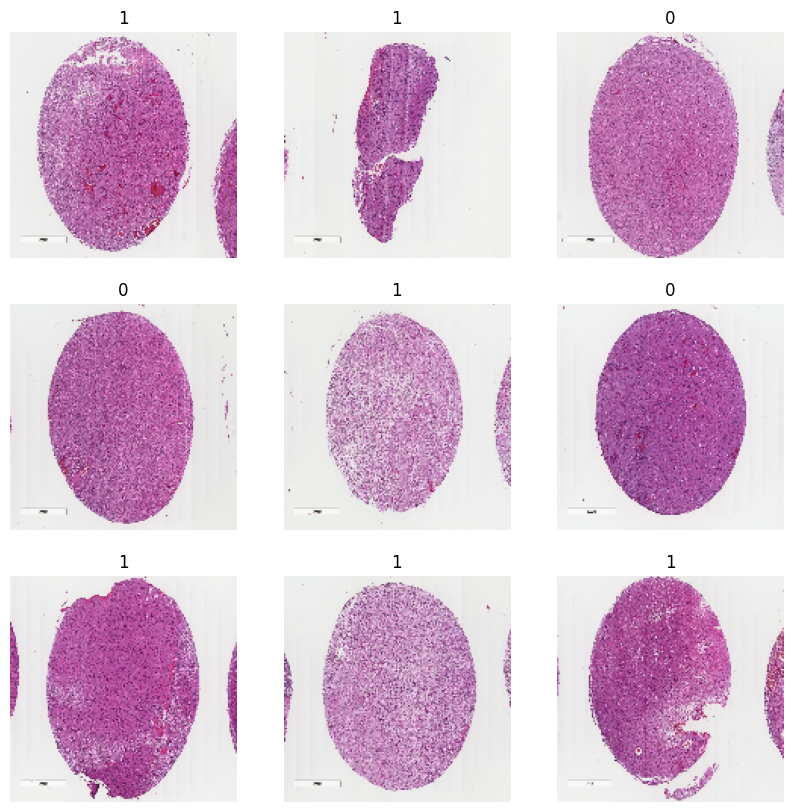

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

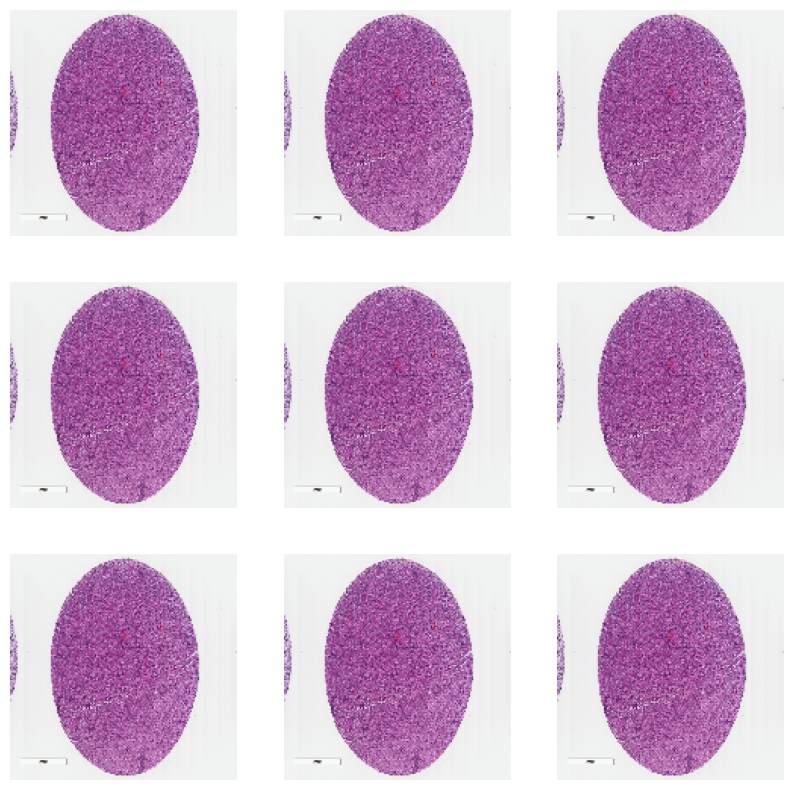

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

In [19]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data_labelled/train'
validation_data_dir = 'data_labelled/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [21]:
model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

NameError: name 'make_model' is not defined

In [28]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint("keras_models/save_at_{epoch}.keras"),
]
model.compile(
    # optimizer=keras.optimizers.Adam(1e-10),
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/100
1/1 [==============================] - 1s 923ms/step - loss: 7.2768 - accuracy: 0.6026 - val_loss: 354.5569 - val_accuracy: 0.6316
Epoch 2/100
1/1 [==============================] - 0s 156ms/step - loss: 311.0659 - accuracy: 0.6410 - val_loss: 34.9718 - val_accuracy: 0.3684
Epoch 3/100
1/1 [==============================] - 0s 156ms/step - loss: 32.4426 - accuracy: 0.3718 - val_loss: 23.9986 - val_accuracy: 0.6316
Epoch 4/100
1/1 [==============================] - 0s 156ms/step - loss: 23.5495 - accuracy: 0.5641 - val_loss: 1.3067 - val_accuracy: 0.6316
Epoch 5/100
1/1 [==============================] - 0s 156ms/step - loss: 3.3835 - accuracy: 0.5513 - val_loss: 11.7375 - val_accuracy: 0.6316
Epoch 6/100
1/1 [==============================] - 0s 156ms/step - loss: 10.5806 - accuracy: 0.6154 - val_loss: 4.4132 - val_accuracy: 0.3684
Epoch 7/100
1/1 [==============================] - 0s 156ms/step - loss: 5.0047 - accuracy: 0.3590 - val_loss: 17.2796 - val_accuracy: 0.6316
Ep

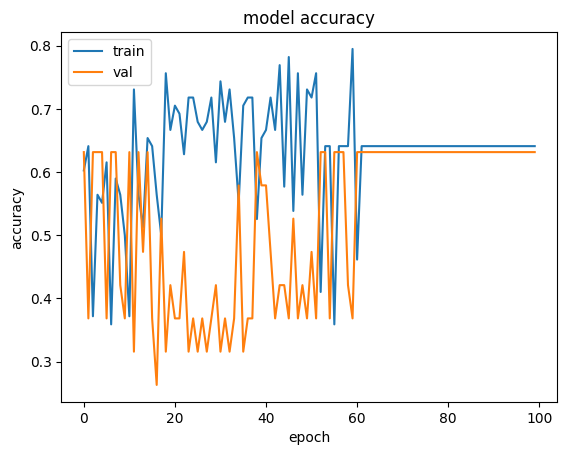

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

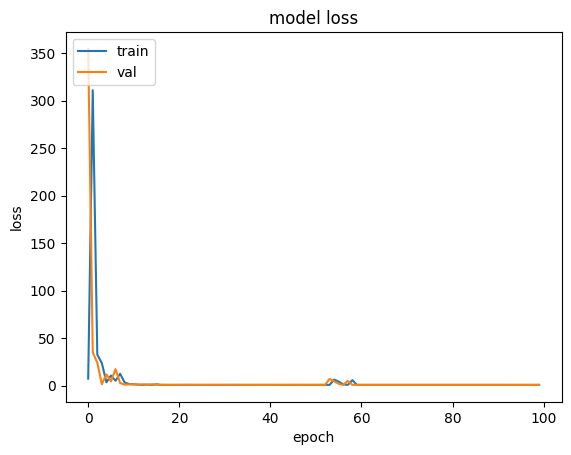

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()